In [ ]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import os
from keras.utils import load_img
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đường dẫn đến thư mục chứa ảnh male và female
male_dir = "/content/drive/MyDrive/Gemaden/Dataset/Train/male"
female_dir = "/content/drive/MyDrive/Gemaden/Dataset/Train/famale"

In [ ]:
def show_image(dir):
    plt.figure(figsize=(12, 7))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        img = random.choice(os.listdir(dir))
        img = load_img(os.path.join(dir, img))
        plt.subplots_adjust(hspace=0.2)
        x = dir.split("/")[-1]
        if x == "male":
            plt.suptitle("Male Images", fontsize=15)
        else:
            plt.suptitle("Female Images", fontsize=15)
        plt.imshow(img)
    plt.tight_layout()

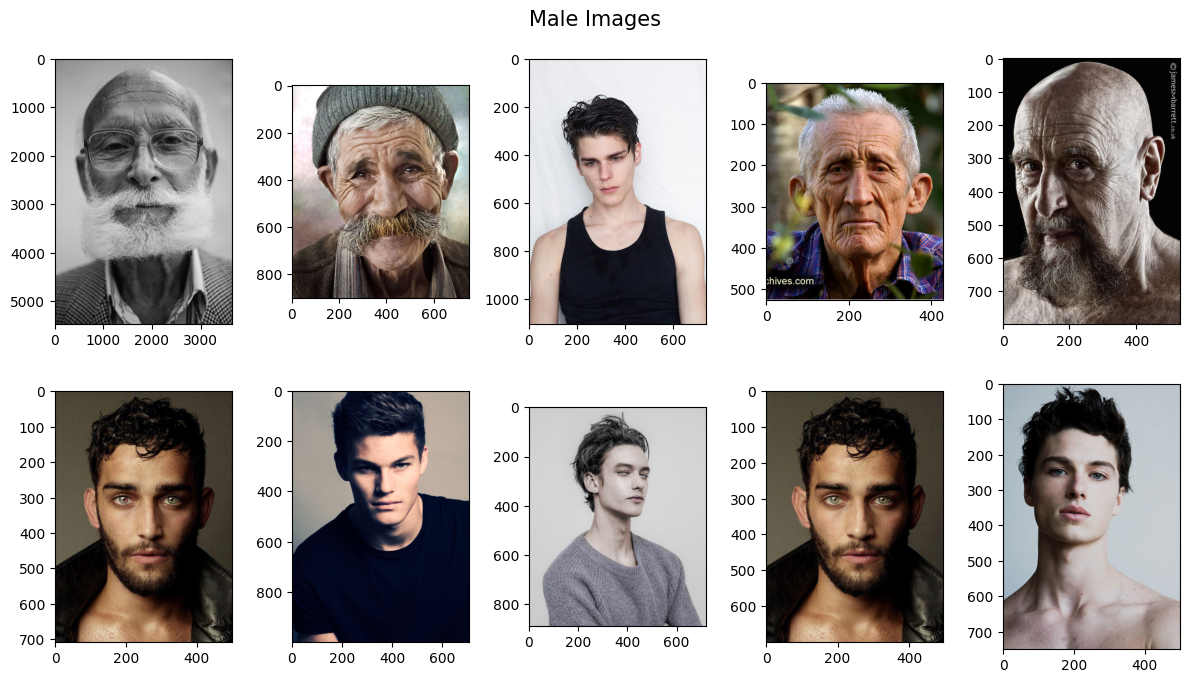

In [ ]:
show_image("/content/drive/MyDrive/Gemaden/Dataset/Train/male")

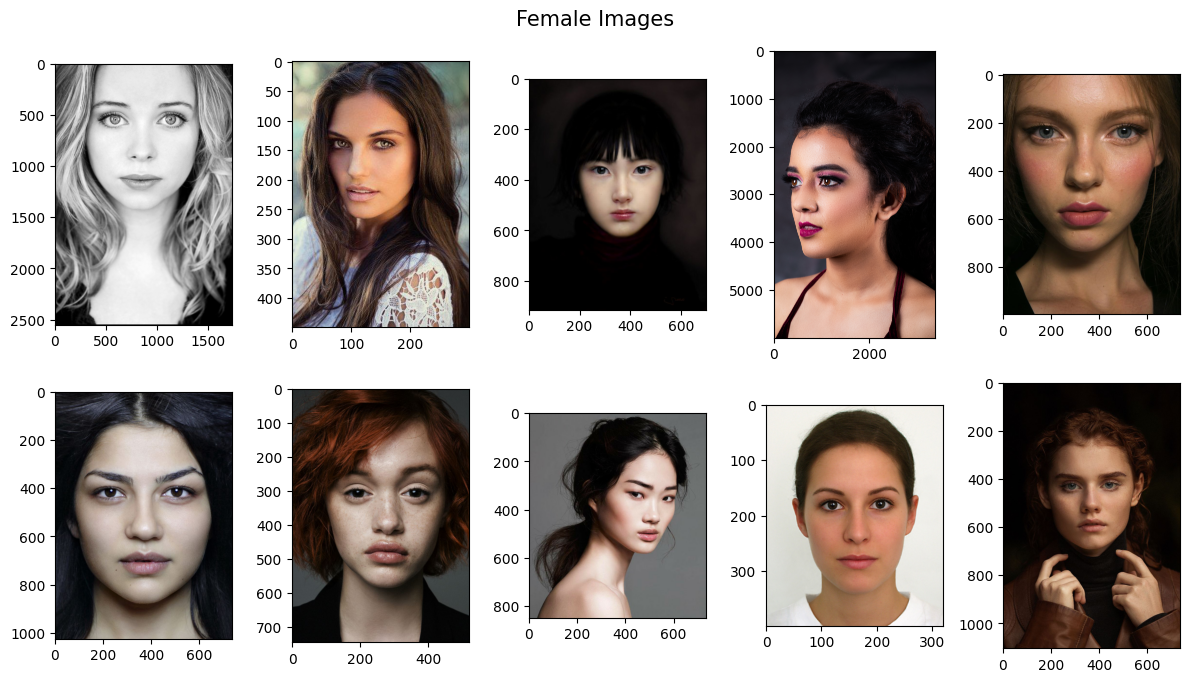

In [ ]:
show_image("/content/drive/MyDrive/Gemaden/Dataset/Train/female")

In [ ]:
# Đọc và xử lý ảnh thành vector đặc trưng

def get_image_vector(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = img / 255.0
    features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), visualize=False, transform_sqrt=True)
    return features

In [ ]:
X = []
y = []
for image_path in glob.glob(male_dir + '/*.jpg') + glob.glob(male_dir + '/*.jpeg'):
    X.append(get_image_vector(image_path))
    y.append(0)  # Nhãn 0 cho giới tính nam

for image_path in glob.glob(female_dir + '/*.jpg') + glob.glob(female_dir + '/*.jpeg'):
    X.append(get_image_vector(image_path))
    y.append(1)  # Nhãn 1 cho giới tính nữ



In [ ]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

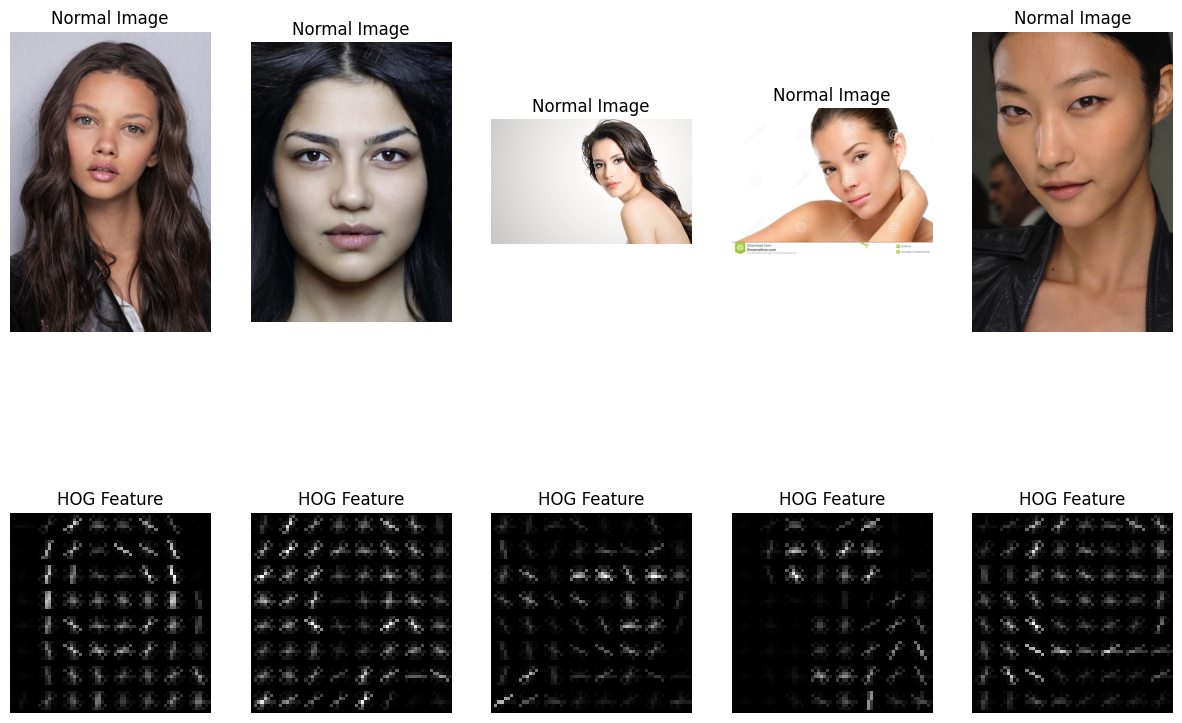

In [ ]:
# Hiển thị 5 ảnh gốc ngẫu nhiên
plt.figure(figsize=(15,10))
for i in range(5):
    img_path = random.choice(glob.glob(female_dir + '/*.jpg'))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title('Normal Image')
    plt.axis('off')

# Hiển thị 5 ảnh đã được trích xuất đặc trưng HOG
plt.subplot(2,5,6)
img_path = random.choice(glob.glob(female_dir + '/*.jpg'))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (64, 64))
features, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, transform_sqrt=True)
plt.imshow(hog_img, cmap='gray')
plt.title('HOG Feature')
plt.axis('off')
plt.subplots_adjust(top=0.9)  # Điều chỉnh khoảng cách trắng giữa dòng trên và dòng dưới
for i in range(1,5):
    plt.subplot(2,5,i+6)
    img_path = random.choice(glob.glob(female_dir + '/*.jpg'))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    features, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, transform_sqrt=True)
    plt.imshow(hog_img, cmap='gray')
    plt.title('HOG Feature')
    plt.axis('off')
    plt.subplots_adjust(top=0.9)  # Điều chỉnh khoảng cách trắng giữa dòng trên và dòng dưới
plt.show()


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Khởi tạo mô hình SVM với kernel tuyến tính
model = SVC(kernel='linear',C=1,gamma='auto',probability=True)

In [ ]:
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

The model is 95.96214511041009% accurate


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Hàm tính toán kết quả đạt được của mô hình
def evaluate(y_train, y_pred):
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='macro')
    recall = recall_score(y_train, y_pred, average='macro')
    f1 = f1_score(y_train, y_pred, average='macro')
    return accuracy, precision, recall, f1

In [ ]:
y_pred = model.predict(X_train)
accuracy, precision, recall, f1 = evaluate(y_train , y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9951311874492832
Precision: 0.9951343647016817
Recall: 0.9951282785198816
F1-score: 0.9951310303490768


In [ ]:
import joblib

# Lưu mô hình vào tệp tin
joblib.dump(model, 'model123.pkl')


['model123.pkl']

In [ ]:
import joblib

# Tải mô hình từ tệp tin
model = joblib.load('model123.pkl')


In [ ]:
import cv2
import joblib
import numpy as np

# Hàm kiểm tra giới tính qua hình ảnh
def predict_gender(image_path, model_path):
    # Đọc ảnh và chuyển đổi thành vector đặc trưng
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = img / 255.0
    features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), visualize=False, transform_sqrt=True)
    features = np.array(features).reshape(1, -1)

    # Tải mô hình đã được huấn luyện
    model = joblib.load(model_path)

    # Dự đoán giới tính
    gender = model.predict(features)[0]

    return gender

# Sử dụng hàm kiểm tra
image_path = "/content/drive/MyDrive/Gemaden/test/797cd90cf02c27f2b9fc17808e70d1d0 - Copy (2).jpg"
model_path = "/content/model123.pkl"

predicted_gender = predict_gender(image_path, model_path)
print("Predicted gender:", predicted_gender)


NameError: ignored

In [ ]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from joblib import dump, load
model = load('/content/drive/MyDrive/Gemaden/model1.sav')

def checking(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Gemaden/xml/haarcascade_frontalface_default.xml")
    faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        # Preprocess image
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (64, 64))
        face = cv2.GaussianBlur(face, (5, 5), 0)
        face = face / 255.0
        features = hog(face, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True)

        # Predict gender
        # Predict gender
        classes = model.predict(features.reshape(1, -1))

        if classes[0] < 0.5:
            gender = "Male"
        else:
            gender = "Female"


        # Draw rectangle around face and display gender prediction
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, gender, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()